In [1]:
import pandas as pd 
import numpy as np 
import os 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
from timeseries_graph_functions import *  # 시각화용 함수 만든것 불러오기 

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [4]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [6]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [7]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 상품군 : 농수축

In [8]:
food_raw = raw_data[raw_data['상품군'] == '농수축']

In [9]:
focus_data = food_raw

In [10]:
focus_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3884 entries, 29 to 35327
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3884 non-null   int64         
 1   방송일시        3884 non-null   datetime64[ns]
 2   노출(분)       3884 non-null   float64       
 3   마더코드        3884 non-null   int64         
 4   상품코드        3884 non-null   int64         
 5   상품명         3884 non-null   object        
 6   상품군         3884 non-null   object        
 7   판매단가        3884 non-null   int64         
 8   취급액         3884 non-null   int64         
 9   날짜          3884 non-null   int64         
 10  시간          3884 non-null   object        
 11  월           3884 non-null   int64         
 12  일           3884 non-null   int64         
 13  요일          3884 non-null   object        
 14  분기          3884 non-null   object        
 15  365일        3884 non-null   int64         
 16  계절          3884 non-n

In [11]:
focus_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
29,30,2019-01-01 15:00:00,20.00,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,14113000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,170.09,232
30,31,2019-01-01 15:20:00,20.00,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,32395000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,205.49,532
31,32,2019-01-01 15:40:00,20.00,100496,201497,뽕셰프 이봉원 특갈비탕 12팩,농수축,60900,39669000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,215.16,651
32,33,2019-01-01 16:00:00,20.00,100322,201479,국내산 손질갑오징어 8팩,농수축,49900,60787000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,237.02,1218
33,34,2019-01-01 16:20:00,20.00,100322,201479,국내산 손질갑오징어 8팩,농수축,49900,115457000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,274.02,2314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35308,38230,2019-12-31 11:40:00,20.00,100253,200864,안동간고등어 20팩,농수축,30900,54879000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,231.59,1776
35309,38231,2019-12-31 12:00:00,20.00,100253,200864,안동간고등어 20팩,농수축,30900,63460000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,239.34,2054
35325,38248,2019-12-31 15:20:00,20.00,100812,202397,제주갈치+참조기세트,농수축,49900,34001000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,207.76,681
35326,38249,2019-12-31 15:40:00,20.00,100812,202397,제주갈치+참조기세트,농수축,49900,54234000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,230.97,1087


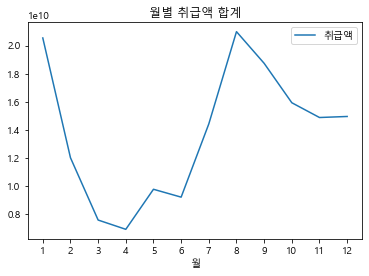

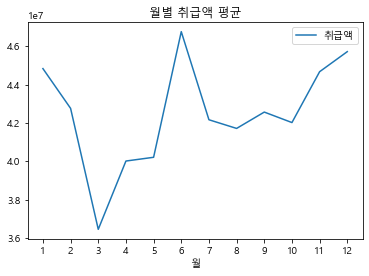

In [12]:
sales_by_month(focus_data)

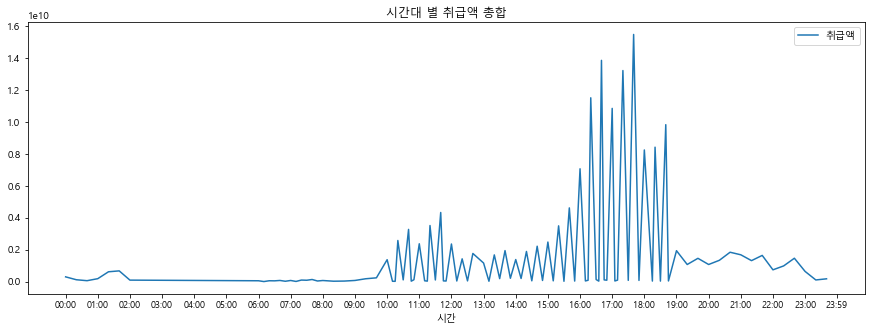

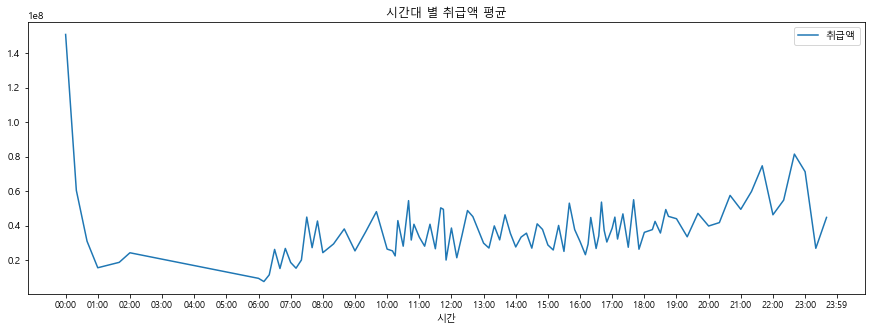

In [13]:
sales_by_time(focus_data)

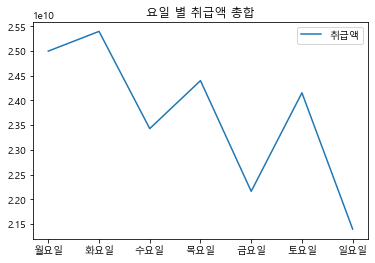

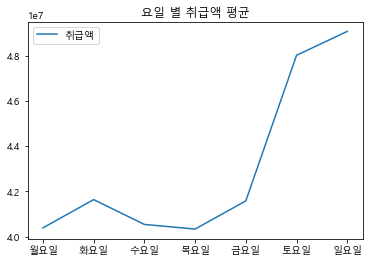

In [14]:
sales_by_yoill(focus_data)

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 총합')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 평균')


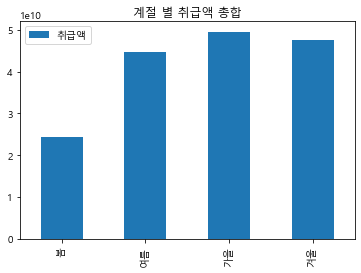

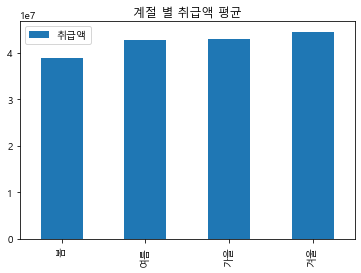

In [15]:
sales_by_season(focus_data)

In [16]:
soldout_by_season(focus_data)

    매진여부
계절      
가을     8
겨울     6
봄      0
여름     0


AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 총액')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 평균')


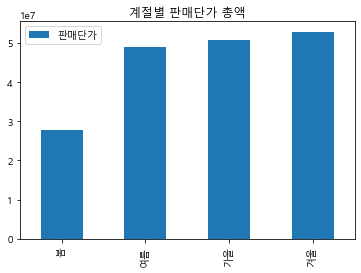

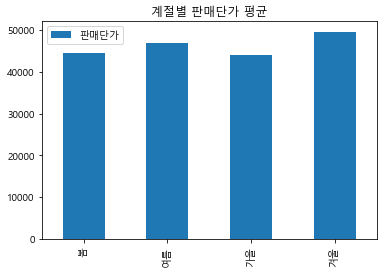

In [17]:
unitprice_by_season(focus_data)

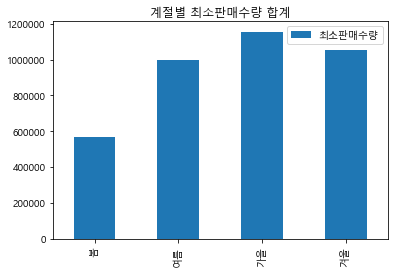

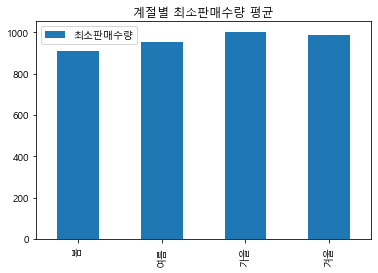

In [18]:
quantity_by_season(focus_data)

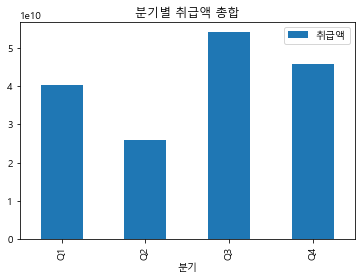

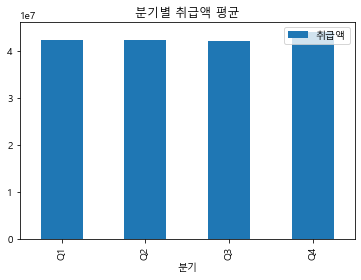

In [19]:
sales_by_Q(focus_data)

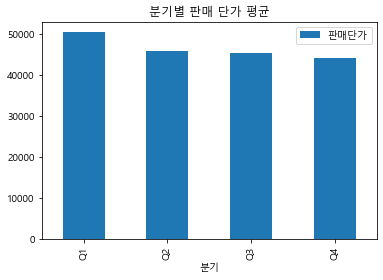

In [20]:
unitprice_by_Q(focus_data)

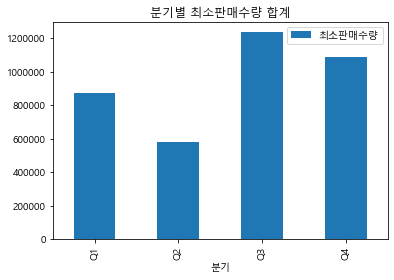

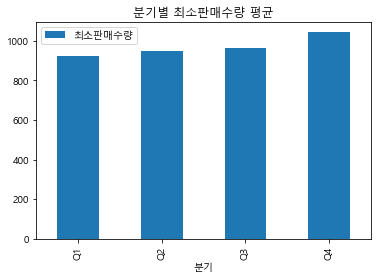

In [21]:
quantity_by_Q(focus_data)